First 5 rows of training data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  

Columns in dataset:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households

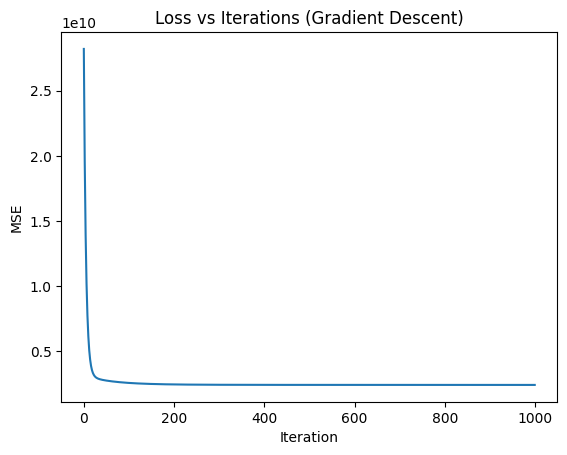

Normal Equation → MSE:4867205486.93, RMSE:69765.36, R2:0.62
Gradient Descent → MSE:4865739423.40, RMSE:69754.85, R2:0.62
Sklearn → MSE:4867205486.93, RMSE:69765.36, R2:0.62


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step A1: Load Training and Test Data
train = pd.read_csv("/content/sample_data/california_housing_train.csv")
test = pd.read_csv("/content/sample_data/california_housing_test.csv")

print("First 5 rows of training data:")
print(train.head())
print("\nColumns in dataset:")
print(train.columns)

# Step A2: Split into Features (X) and Target (y)
TARGET = "median_house_value"

# Training
X_train_raw = train.drop(columns=[TARGET]).values
y_train = train[TARGET].values

# Validation
X_test_raw = test.drop(columns=[TARGET]).values
y_test = test[TARGET].values

print("\nShapes before scaling:")
print("X_train_raw:", X_train_raw.shape)
print("y_train:", y_train.shape)
print("X_test_raw:", X_test_raw.shape)
print("y_test:", y_test.shape)

scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

print("\nAfter scaling:")
print("Mean of train features (approx):", X_train.mean(axis=0))
print("Std of train features (approx):", X_train.std(axis=0))

# Step A3: Add bias (intercept) column
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

print("\nAfter adding bias column:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


# Step B: Normal Equation
# -------------------------
theta_ne = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
y_pred_ne = X_test @ theta_ne

# -------------------------
# Step C: Gradient Descent
# -------------------------
def gradient_descent(X, y, lr=0.01, iters=1000):
    n, d = X.shape
    theta = np.zeros(d)
    losses = []
    for _ in range(iters):
        error = X @ theta - y
        theta -= (lr/n) * (X.T @ error)
        loss = np.mean(error**2) / 2
        losses.append(loss)
    return theta, losses

theta_gd, losses = gradient_descent(X_train, y_train, lr=0.1, iters=1000)
y_pred_gd = X_test @ theta_gd

plt.plot(losses)
plt.title("Loss vs Iterations (Gradient Descent)")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()

# -------------------------
# Step E: Scikit-Learn Linear Regression
# -------------------------
model = LinearRegression()
model.fit(X_train[:,1:], y_train)  # exclude bias (sklearn handles intercept)
y_pred_sk = model.predict(X_test[:,1:])

# -------------------------
# Step G: Evaluation
# -------------------------
def evaluate(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → MSE:{mse:.2f}, RMSE:{rmse:.2f}, R2:{r2:.2f}")

evaluate("Normal Equation", y_test, y_pred_ne)
evaluate("Gradient Descent", y_test, y_pred_gd)
evaluate("Sklearn", y_test, y_pred_sk)
